In [1]:
import itertools
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import figure
import glob
from datetime import datetime
import statsmodels.api as sm
from datetime import datetime, timedelta
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.metrics import mean_squared_error

C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def read_file_to_df(path):
    all_files = glob.glob(path + '/*.csv')
    df = pd.DataFrame()
    for filename in all_files:
        temp = pd.read_csv(filename)
        df = pd.concat([df, temp])
    return df

In [3]:
def fix_data(data, name_of_pump):
    data = data[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]
    data = data.rename(columns = {'hstWaarde' : '{}'.format(name_of_pump)})
    data['datetime'] = pd.to_datetime(data['datumBeginMeting'], format = '%Y-%m-%d %H:%M:%S')
    data['datumBeginMeting'] = pd.to_datetime(data['datumBeginMeting'], format='%Y-%m-%d %H:%M:%S')
    data['datumEindeMeting'] = pd.to_datetime(data['datumEindeMeting'], format='%Y-%m-%d %H:%M:%S')
    data = data.set_index('datumBeginMeting')
    data = data.sort_index() # Datetime index
    return data

In [4]:
def first_non_zero(data, name):
    s = pd.Series(data[name])
    f = pd.DataFrame(s.iloc[s.nonzero()[0]]).reset_index()

    m_index = f['datumBeginMeting'][0]
    print(m_index)
    data3 = data.loc[m_index:,:]
    data3[name].plot()
    return data3

In [5]:
def dry_df(df):
    df = pd.read_csv(df, sep="\n", header=None)
    df.columns = ["a"]
    df['datetime'] = pd.to_datetime(df['a'], format = '%Y-%m-%d %H:%M:%S')
    df = df[['datetime']]
    return df

In [6]:
def whole_df(df):
    df = pd.read_csv('./data/den bosch/whole map/' + df + '.csv', sep="," or "\n")
    df = df.iloc[:,1:3].rename(columns = {'Begin':'Datetime', df.columns[2]:'Rain'})
    
    df = df.set_index(pd.to_datetime(df['Datetime'], format = '%Y-%m-%d %H:%M:%S'))
    df['Rain'] = df['Rain'] * 10000
    df = df.groupby(pd.TimeGrouper('H'))['Rain'].sum()

#     df['datetime'] = pd.to_datetime(df['a'], format = '%Y-%m-%d %H:%M:%S')
#     df = df.set_index(df['datetime'])
    return df

In [7]:
def filterDryDays(data, dry, name_of_pump):
    data = pd.DataFrame(data)
    dry = np.where(data.index.isin(dry['datetime']), 1, 0)
    data['dry'] = dry
    data = data[data['dry'] == 1]
    #data['interaction'] = data[name_of_pump] * data['dry']#.groupby([de_rompert.index.year, de_rompert.index.month, de_rompert.index.day, de_rompert.index.hour]).mean()
    return data

In [8]:
def joinOnRain(data, whole, name_of_pump):
    whole = pd.DataFrame(whole)
    data = pd.DataFrame(data)
    rain = np.where(whole.index.isin(data.index), 1, 0)
    data = data[data['dry'] == 1]
    #data['interaction'] = data[name_of_pump] * data['dry']#.groupby([de_rompert.index.year, de_rompert.index.month, de_rompert.index.day, de_rompert.index.hour]).mean()
    return data

In [9]:
def create_dummies(data, y):
    data['1'] = np.where(data.index.hour == 0, 1, 0)
    data['2'] = np.where(data.index.hour == 1, 1, 0)
    data['3'] = np.where(data.index.hour == 2, 1, 0)
    data['4'] = np.where(data.index.hour == 3, 1, 0)
    data['5'] = np.where(data.index.hour == 4, 1, 0)
    data['6'] = np.where(data.index.hour == 5, 1, 0)
    data['7'] = np.where(data.index.hour == 6, 1, 0)
    data['8'] = np.where(data.index.hour == 7, 1, 0)
    data['9'] = np.where(data.index.hour == 8, 1, 0)
    data['10'] = np.where(data.index.hour == 9, 1, 0)
    data['11'] = np.where(data.index.hour == 10, 1, 0)
    data['12'] = np.where(data.index.hour == 11, 1, 0)
    data['13'] = np.where(data.index.hour == 12, 1, 0)
    data['14'] = np.where(data.index.hour == 13, 1, 0)
    data['15'] = np.where(data.index.hour == 14, 1, 0)
    data['16'] = np.where(data.index.hour == 15, 1, 0)
    data['17'] = np.where(data.index.hour == 16, 1, 0)
    data['18'] = np.where(data.index.hour == 17, 1, 0)
    data['19'] = np.where(data.index.hour == 18, 1, 0)
    data['20'] = np.where(data.index.hour == 19, 1, 0)
    data['21'] = np.where(data.index.hour == 20, 1, 0)
    data['22'] = np.where(data.index.hour == 21, 1, 0)
    data['23'] = np.where(data.index.hour == 22, 1, 0)
    
    data['monday'] = np.where(data.index.day == 0, 1, 0)
    data['tuesday'] = np.where(data.index.day == 1, 1, 0)
    data['wednesday'] = np.where(data.index.day == 2, 1, 0)
    data['thursday'] = np.where(data.index.day == 3, 1, 0)
    data['friday'] = np.where(data.index.day == 4, 1, 0)
    data['saturday'] = np.where(data.index.day == 5, 1, 0)
    
    data['january'] = np.where(data.index.month == 1, 1, 0)
    data['february'] = np.where(data.index.month == 2, 1, 0)
    data['march'] = np.where(data.index.month == 3, 1, 0)
    data['april'] = np.where(data.index.month == 4, 1, 0)
    data['may'] = np.where(data.index.month == 5, 1, 0)
    data['june'] = np.where(data.index.month == 6, 1, 0)
    data['july'] = np.where(data.index.month == 7, 1, 0)
    data['august'] = np.where(data.index.month == 8, 1, 0)
    data['september'] = np.where(data.index.month == 9, 1, 0)
    data['october'] = np.where(data.index.month == 10, 1, 0)
    data['november'] = np.where(data.index.month == 11, 1, 0)
    
#     data['1hour'] = data[y].shift(-1)
#     data['2hours'] = data[y].shift(-2)
#     data['3hours'] = data[y].shift(-3)
    
    return data

In [10]:
def RF_model(data, name):
    X = (data.drop([name], axis = 1))
    y = (data[name])
    
    X_train = X.iloc[:round(0.8*len(X)),:]
    y_train = y.iloc[:round(0.8*len(y))]            
    
    X_test = X.iloc[round(0.8*len(X)):,:]  
    y_test = y.iloc[round(0.8*len(y)):]
    
    RF_Model = RandomForestRegressor(n_estimators=200, max_features=34, oob_score=True)
    
    labels = y_train#[:, None]
    features = X_train

    rgr=RF_Model.fit(features, labels)
    
    X_test_predict2 = rgr.predict(X_test)
    validation = pd.DataFrame(X_test_predict2, y_test).reset_index().rename(columns = {name:'Real flow', 0:'Prediction Flow'})

    validation = validation.set_index(X_test.index)
    
    return validation

In [11]:
def complete_preprocess_for_model(path, name, dry_filename, whole_df_name):
    data = read_file_to_df(path)
    data = fix_data(data, name)
    data = first_non_zero(data, name)
    data = data.groupby(pd.TimeGrouper('H'))[name].mean()
    dry = dry_df(dry_filename)
    whole = whole_df(whole_df_name)
    data = filterDryDays(data, dry, name)
    data = create_dummies(data, name)
    data2 = RF_model(data, name)
    return data ,data2, dry, whole


C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


2018-04-19 10:40:00


C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """
C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  import sys


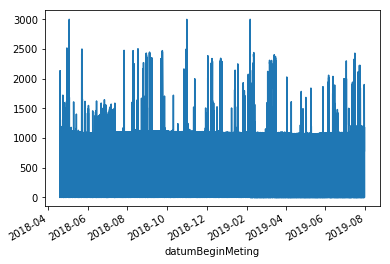

In [12]:
original, de_rompert, dry_rompert, whole_rompert = complete_preprocess_for_model('./data/den bosch/sewer_data_db/flow/de Rompert/', 'de_rompert', 'dry_rompert', 'whole_rompert')

In [27]:
def make_match(data, prediction, hours):
    matched = pd.merge(data, prediction, left_index=True, right_index=True)    
    matched['constant prediction'] = matched['Prediction Flow'].rolling(window = hours).mean()
    matched = matched.dropna()
    matched['total_rompert'] = matched['de_rompert'].cumsum()
    matched['total_model'] = matched['constant prediction'].cumsum()
    return matched
matched = make_match(original, de_rompert, 24)


## average over next 24 hours

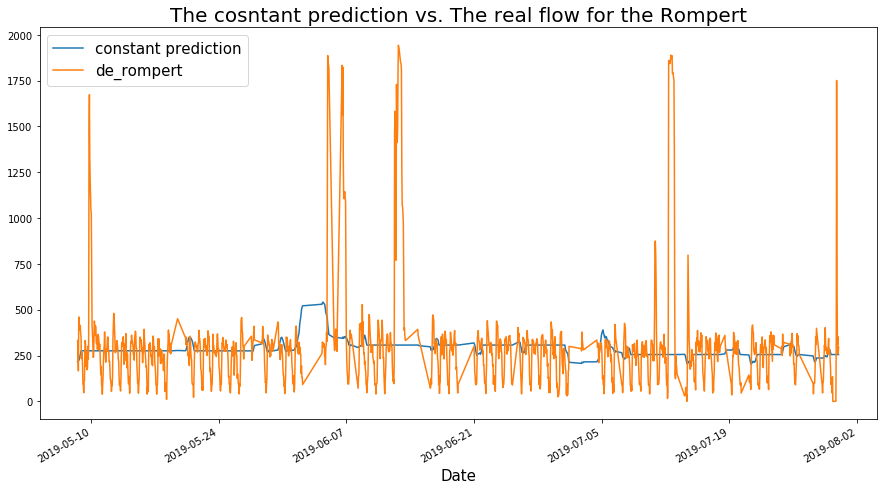

In [29]:
ax = matched[['constant prediction', 'de_rompert']].plot(figsize=(15,8))
ax.set_title('The constant prediction vs. The real flow ' + 'for the Rompert', size = 20)
ax.set_xlabel('Date', size = 15)
ax.legend(prop={'size': 15})

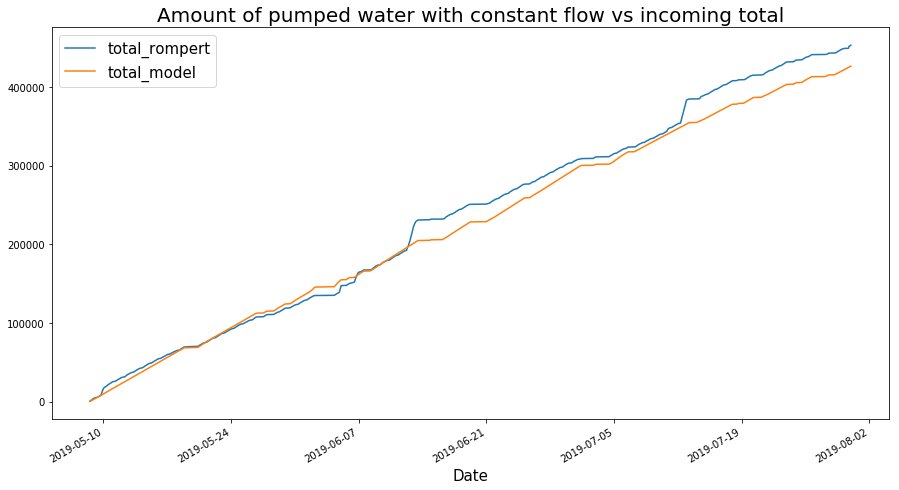

In [30]:
ax = matched[['total_rompert', 'total_model']].plot(figsize=(15,8))
ax.set_title('Amount of pumped water with constant flow vs incoming total', size = 20)
ax.set_xlabel('Date', size = 15)
ax.legend(prop={'size': 15})

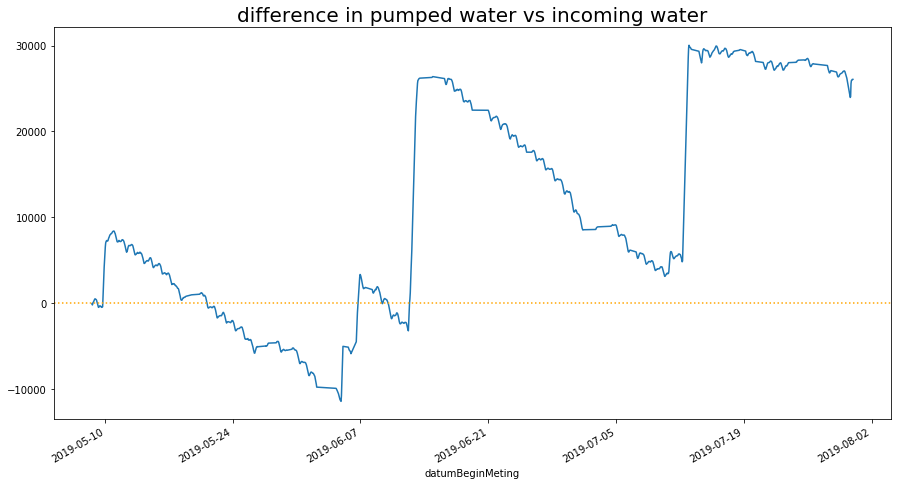

In [52]:
matched['difference'] = matched['total_rompert'] - matched['total_model']
ax = matched.difference.plot(figsize = (15,8))
ax.set_title('difference in pumped water vs incoming water', size = 20)
ax.axhline(y=0, c = 'orange', linestyle = ':')

## average over next 48 hours

In [88]:
matched = make_match(original, de_rompert, 48)

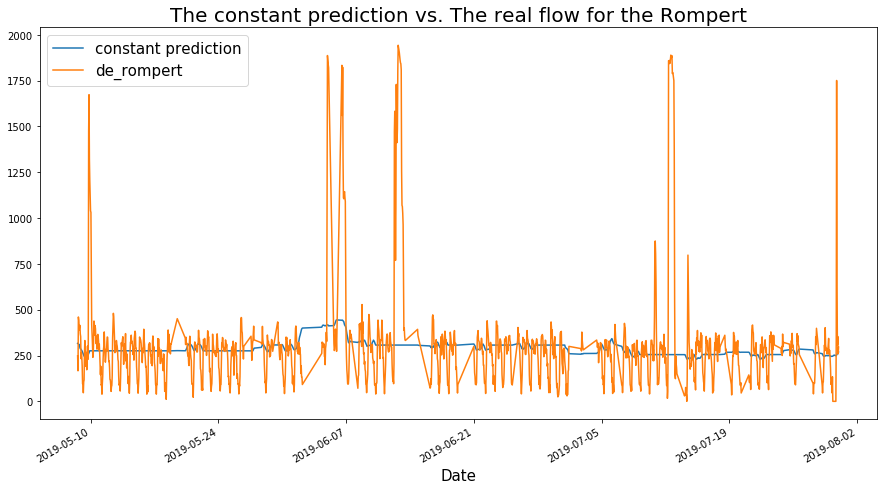

In [89]:
ax = matched[['constant prediction', 'de_rompert']].plot(figsize=(15,8))
ax.set_title('The constant prediction vs. The real flow ' + 'for the Rompert', size = 20)
ax.set_xlabel('Date', size = 15)
ax.legend(prop={'size': 15})

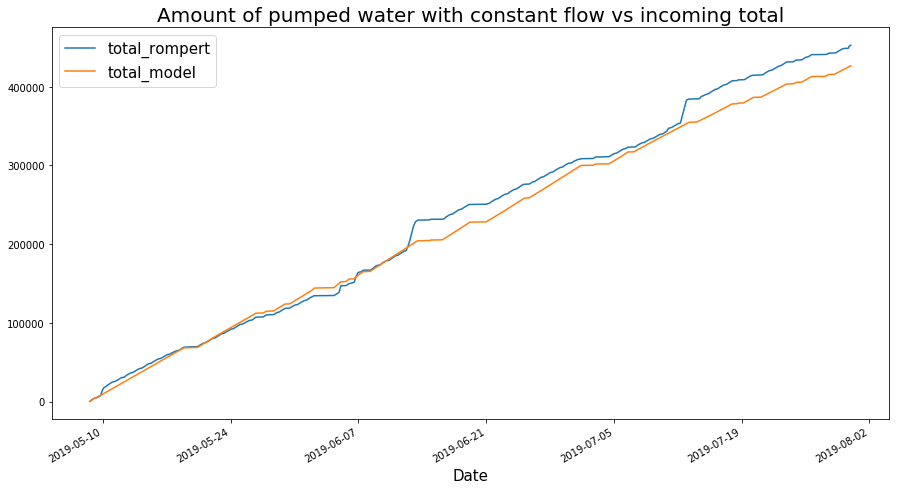

In [90]:
ax = matched[['total_rompert', 'total_model']].plot(figsize=(15,8))
ax.set_title('Amount of pumped water with constant flow vs incoming total', size = 20)
ax.set_xlabel('Date', size = 15)
ax.legend(prop={'size': 15})

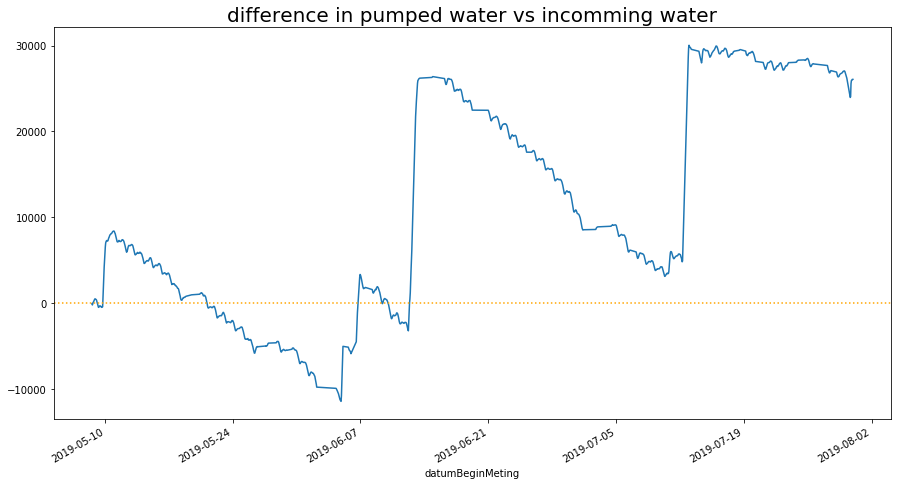

In [91]:
matched['difference'] = matched['total_rompert'] - matched['total_model']
ax = matched.difference.plot(figsize = (15,8))
ax.set_title('difference in pumped water vs incomming water', size = 20)
ax.axhline(y=0, c = 'orange', linestyle = ':')

In [105]:
matched2 = matched['Prediction Flow'].groupby(pd.Grouper(freq='1D')).mean()
matched['mean_per_day'] = matched2
matched['mean_per_day'] = matched.groupby(pd.Grouper(freq='1D'))['mean_per_day'].transform('first')


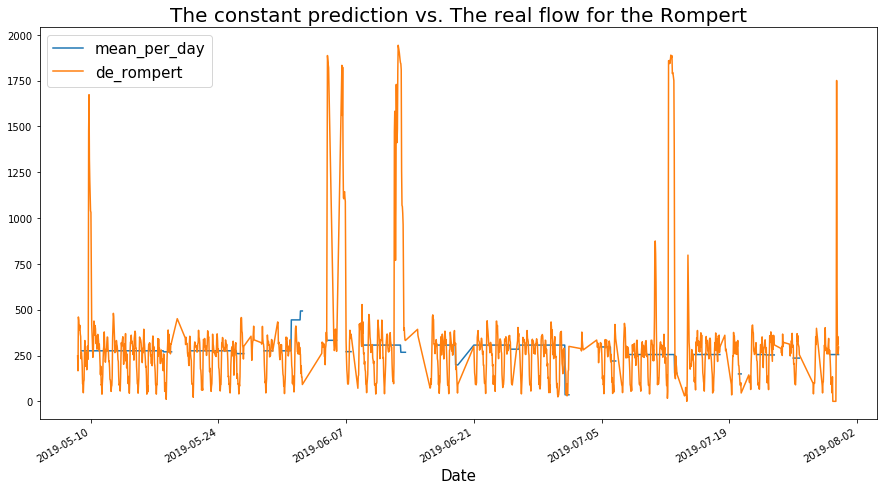

In [106]:
ax = matched[['mean_per_day', 'de_rompert']].plot(figsize=(15,8))
ax.set_title('The constant prediction vs. The real flow ' + 'for the Rompert', size = 20)
ax.set_xlabel('Date', size = 15)
ax.legend(prop={'size': 15})